### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 30th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [45]:
import numpy as np 
import scipy
from scipy.stats import uniform, norm, rv_histogram
from scipy import stats
import matplotlib.pyplot as plt
from scipy import optimize
import chainconsumer
import corner
import dynesty
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from astroML.density_estimation import KNeighborsDensity
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing
from astroML.linear_model import (LinearRegression, PolynomialRegression,
                                  BasisFunctionRegression, NadarayaWatson)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


%matplotlib inline

In [4]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [ ]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [ ]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

# 1

In [4]:
# LSS load data
loaddata = np.load('../../../homeworks/hw_data/hw7_data_1.npy')
X = loaddata[:, :2]
y = loaddata[:, 2]
yerr = loaddata[:, 3]

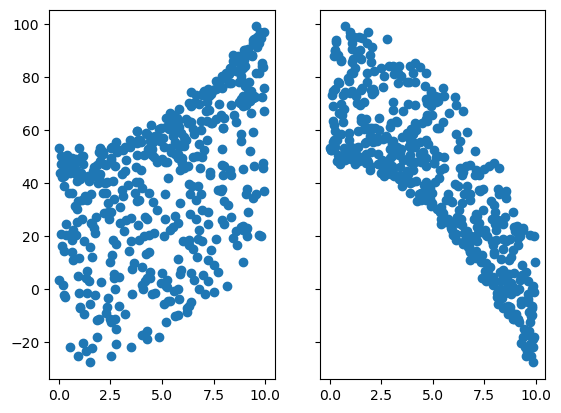

In [23]:
fig = plt.figure()
axes = fig.subplots(nrows=1, ncols=2, sharey=True)
axes[0].scatter(X[:, 0], y)
axes[1].scatter(X[:, 1], y)
plt.show()

# 2

In [31]:
linrgr = LinearRegression()
linrgr.fit(X, y, yerr)
print('incercept, feature1 coef, feature2 coef below')
print(linrgr.coef_)
linrgrint, mf1, mf2 = linrgr.coef_

incercept, feature1 coef, feature2 coef below
[57.10102323  4.94873016 -8.30023407]


In [24]:
# LSS finding feature min/max
print(np.min(X[:, 0]), np.max(X[:,0]))
print(np.min(X[:, 1]), np.max(X[:,1]))


0.029542954023376033 9.946084302327826
0.004170309106973358 9.950075144284998


In [28]:
f1range = np.linspace(0, 10, 50)
f2range = np.linspace(0, 10, 50)
Xgrid = np.vstack([f1range, f2range]).T
Xgrid.shape

(50, 2)

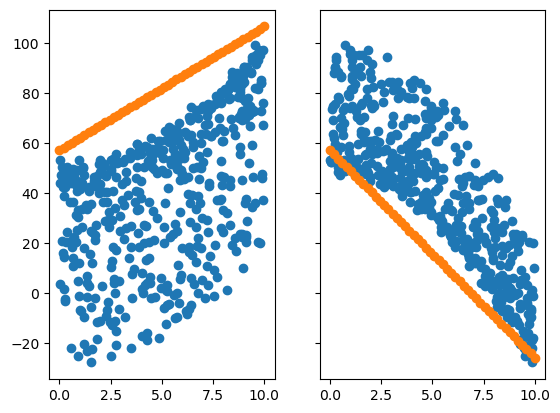

In [32]:
fig = plt.figure()
axes = fig.subplots(nrows=1, ncols=2, sharey=True)
# LSS plot original data
axes[0].scatter(X[:, 0], y)
axes[1].scatter(X[:, 1], y)

axes[0].scatter(Xgrid[:,0], mf1*Xgrid[:,0]+linrgrint)
axes[1].scatter(Xgrid[:,1], mf2*Xgrid[:,1]+linrgrint)
plt.show()

# 3

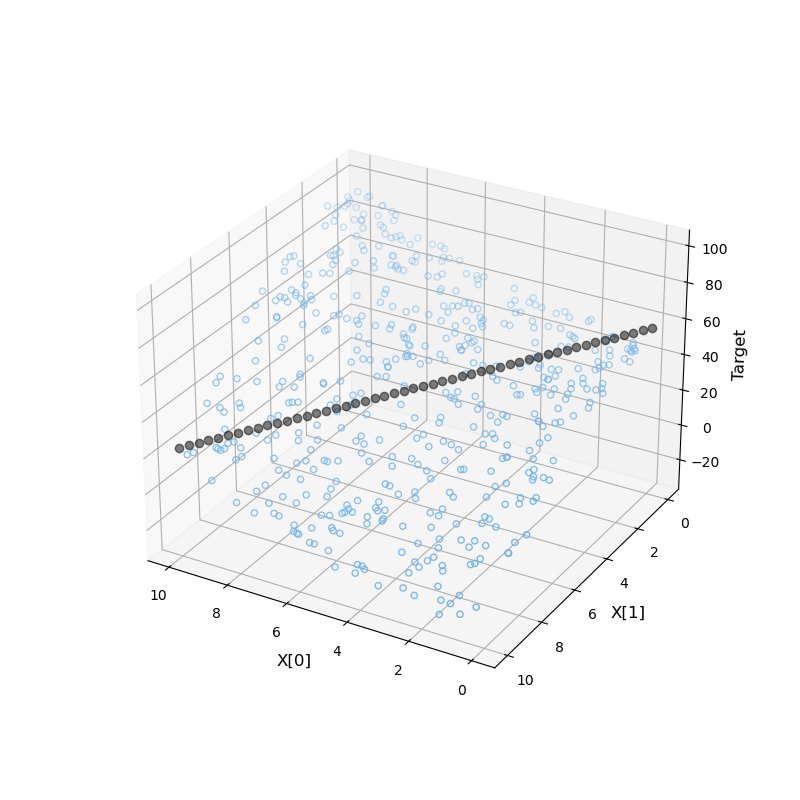

In [34]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(f1range, f2range, linrgr.predict(Xgrid), color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(X[:, 0].flatten(), X[:, 1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [35]:
%matplotlib inline

# 4

In [41]:
# LSS from lecture 14
grid = GridSearchCV(Ridge(), {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}, cv=5)
grid.fit(X, y)

bestal = grid.best_params_['alpha']
print("best alpha choice:", bestal)
bestso = grid.best_params_['solver']
print("best solver choice:", bestso)
bestscore = grid.best_score_
print("best score:", bestscore)


best alpha choice: 1.0
best solver choice: svd
best score: 0.9290800590702192


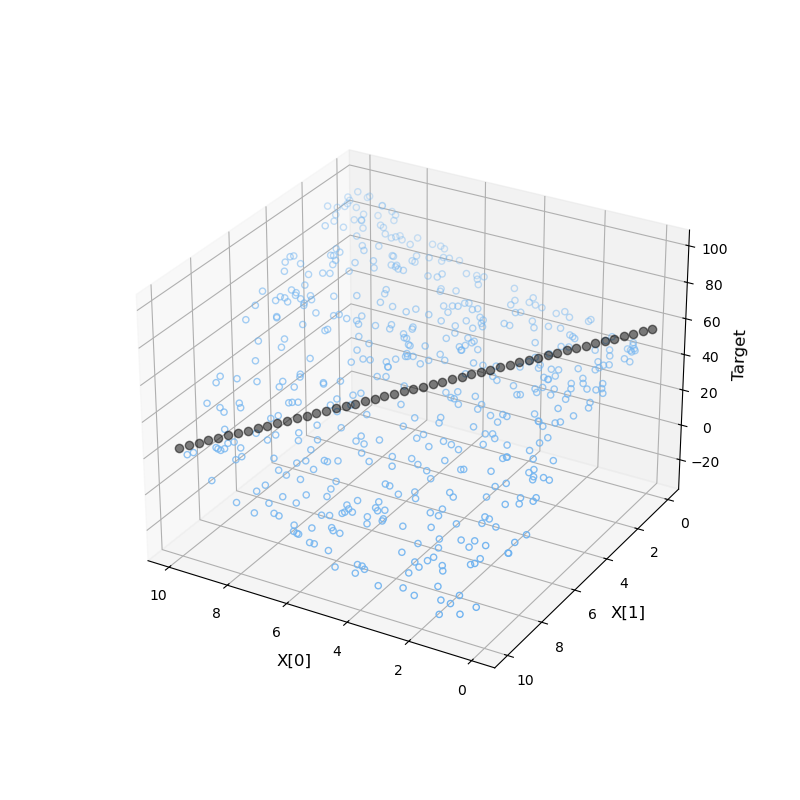

In [42]:
rdg = Ridge(alpha=bestal, solver=bestso)
rdg.fit(X, y)


# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(f1range, f2range, rdg.predict(Xgrid), color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(X[:, 0].flatten(), X[:, 1].flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [44]:
%matplotlib inline

In [47]:
ridgecv = RidgeCV(alphas=[0.05,0.1,0.2,0.5,1.0], cv=5) #Complete
ridgecv.fit(X, y)

print("best alpha choice (gridCV):", bestal)
bestalrcv = ridgecv.alpha_
print("best alpha choice (ridgeCV):", bestalrcv)



best alpha choice (gridCV): 1.0
best alpha choice (ridgeCV): 1.0


* hurrah! The CV methods give the same preferred alpha!

# 5